In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
#checking library versions
import matplotlib
print("Pandas version",pd.__version__)
print("Numpy version",np.__version__)
print("matplotlib version",matplotlib.__version__)
print("seaborn version",sbn.__version__)

Pandas version 2.0.2
Numpy version 1.24.3
matplotlib version 3.7.1
seaborn version 0.12.2


# Clean the Census data 

In [3]:
df=pd.read_csv("census_2011.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Columns: 118 entries, District code to Total_Power_Parity
dtypes: float64(115), int64(1), object(2)
memory usage: 590.1+ KB


In [5]:
df.shape

(640, 118)

### Problem Statement 1: (Keep the relevant data) The census 2011 file contains many fields, which we may not use. Remove some columns so that we are left with only relevant data.
- We may need the following columns.
    1. State name
    2. District name
    3. Population
    4. Male
    5. Female
    6. Literate
    7. Male_Literate
    8. Female_Literate
    9. Rural_Households
    10. Urban_Households
    11. Households
    12. Age_Group_0_29
    13. Age_Group_30_49
    14. Age_Group_50
    15. Age not stated


In [6]:
df_relevant=df[["State name","District name","Population","Male",
                "Female",'Literate','Male_Literate','Female_Literate','Rural_Households',
                'Urban_Households','Households','Age_Group_0_29','Age_Group_30_49',
                'Age_Group_50','Age not stated']]

### Problem Statement 2: (Rename the Column names) For uniformity in the datasets and taking into consideration the census year, we need to rename some columns. 
1. State name  to State/UT
2. District name  to District
3. Male_Literate to Literate_Male
4. Female_Literate to Literate_Female
5. Rural_Households  to Households_Rural
6. Urban_ Households  to Households_Urban
7. Age_Group_0_29 to Young_and_Adult
8. Age_Group_30_49 to Middle_Aged
9. Age_Group_50 to Senior_Citizen
10. Age not stated to Age_Not_Stated


In [7]:
#renaming columns as per mentioned
df_relevant=df_relevant.rename(columns={"State name":"State/UT","District name":"District",
                                   'Male_Literate':"Literate_Male",'Female_Literate':"Literate_Female",
                                    'Rural_Households':'Households_Rural','Urban_Households':"Households_Urban",
                                    'Age_Group_0_29':"Young_and_Adult",'Age_Group_30_49':"Middle_Aged",
                                    'Age_Group_50':"Senior_Citizen",'Age not stated':"Age_Not_Stated"})

In [8]:
#remaned columns
df_relevant.columns

Index(['State/UT', 'District', 'Population', 'Male', 'Female', 'Literate',
       'Literate_Male', 'Literate_Female', 'Households_Rural',
       'Households_Urban', 'Households', 'Young_and_Adult', 'Middle_Aged',
       'Senior_Citizen', 'Age_Not_Stated'],
      dtype='object')

### Problem Statement 3: (Rename State/UT Names) The State/UT names are in all caps in the census data, For uniformity across datasets we use the names so that only the first character of each word in the name is in upper case and the rest are in lower case. However, if the word is “and” then it should be all lowercase.
Examples: 
1. Andaman and Nicobar Islands
2. Arunachal Pradesh
3. Bihar


In [9]:
def ExceptAndTitle(text):
    text=str(text).lower()
    l=text.split(" ")
    l=[i[0].upper()+i[1::] if i not in["and","of"] else i for i in l]
    return " ".join(l)
# Test case 1
print(ExceptAndTitle("JAMMU AND KASMIR"))
#Test case 2
print(ExceptAndTitle("ANDHRA PRADESH"))

Jammu and Kasmir
Andhra Pradesh


In [10]:
df_relevant['State/UT']=df_relevant['State/UT'].apply(ExceptAndTitle)

In [11]:
df_relevant["State/UT"].value_counts()

State/UT
Uttar Pradesh                  71
Madhya Pradesh                 50
Bihar                          38
Maharashtra                    35
Rajasthan                      33
Tamil Nadu                     32
Karnataka                      30
Orissa                         30
Assam                          27
Gujarat                        26
Jharkhand                      24
Andhra Pradesh                 23
Jammu and Kashmir              22
Haryana                        21
Punjab                         20
West Bengal                    19
Chhattisgarh                   18
Arunachal Pradesh              16
Kerala                         14
Uttarakhand                    13
Himachal Pradesh               12
Nagaland                       11
Manipur                         9
Nct of Delhi                    9
Mizoram                         8
Meghalaya                       7
Tripura                         4
Sikkim                          4
Pondicherry                     4
Andam

### Problem Statement 4: (New State/UT formation)
1. In 2014 Telangana was formed after it split from Andhra Pradesh, The districts that were included in Telangana are stored in Data/Telangana.txt . Read the text file and Rename the State/UT From “Andhra Pradesh” to “Telangana” for the given districts.

2. In 2019 Laddakh was formed after it split from Jammu and Kashmir, which included the districts Leh and Kargil.  Rename the State/UT From “Jammu and Kashmir” to “Laddakh” for the given districts. 


In [12]:
#Telengala Districts  from file
file = open('Telangana.txt', 'r')
data = file.read()
file.close()
Telengana=list(data.split())

#Laddak Districts from statement are
Laddak=["Leh(Ladakh)","Kargil"]
Telengana

['Adilabad',
 'Nizamabad',
 'Karimnagar',
 'Medak',
 'Hyderabad',
 'Rangareddy',
 'Mahbubnagar',
 'Nalgonda',
 'Warangal',
 'Khammam']

In [13]:
# mapping telengana and laddak districts
df_relevant['State/UT'] = df_relevant.apply(lambda row: 'Telangana' if row['District'] in Telengana else row['State/UT'], axis=1)
df_relevant['State/UT'] = df_relevant.apply(lambda row: 'Laddak' if row['District'] in Laddak else row['State/UT'], axis=1)

In [14]:
df_relevant["State/UT"].value_counts()

State/UT
Uttar Pradesh                  71
Madhya Pradesh                 50
Bihar                          38
Maharashtra                    35
Rajasthan                      33
Tamil Nadu                     32
Karnataka                      30
Orissa                         30
Assam                          27
Gujarat                        26
Jharkhand                      24
Haryana                        21
Jammu and Kashmir              20
Punjab                         20
West Bengal                    19
Chhattisgarh                   18
Arunachal Pradesh              16
Kerala                         14
Andhra Pradesh                 13
Uttarakhand                    13
Himachal Pradesh               12
Nagaland                       11
Telangana                      10
Nct of Delhi                    9
Manipur                         9
Mizoram                         8
Meghalaya                       7
Pondicherry                     4
Tripura                         4
Sikki

### Problem Statement 5: (Find and process Missing Data) Find and store the percentage of data missing for each column. Some data can be found and filled in by using information from other cells. Try to find the correct data by using information from other cells and filling it in. Find and store the percentage of data missing for each column.
<Strong>Hint:</Strong>
1. Population = Male + Female
2. Literate = Literate_Male + Literate_Female
3. Population  = Young_and_Adult+  Middle_Aged + Senior_Citizen + Age_Not_Stated
4. Households = Households_Rural + Households_Urban 
<br>
<br>
<Strong>Create a visualization that compares the amount of missing data before and after the data-filling process was done.</Strong>
 

In [15]:
df_relevant.columns

Index(['State/UT', 'District', 'Population', 'Male', 'Female', 'Literate',
       'Literate_Male', 'Literate_Female', 'Households_Rural',
       'Households_Urban', 'Households', 'Young_and_Adult', 'Middle_Aged',
       'Senior_Citizen', 'Age_Not_Stated'],
      dtype='object')

In [16]:
#recalculation
df_relevant["Population"] = df_relevant["Male"] + df_relevant["Female"]
df_relevant["Literate"] = df_relevant["Literate_Male"] + df_relevant["Literate_Female"]
df_relevant["Population"] = df_relevant["Young_and_Adult"]+ df_relevant["Middle_Aged"] + df_relevant["Senior_Citizen"] + df_relevant["Age_Not_Stated"]
df_relevant["Households"] = df_relevant["Households_Rural"] + df_relevant["Households_Urban"]

In [17]:
#cleaning null values
df_relevant.isnull().sum()

State/UT              0
District              0
Population          117
Male                 30
Female               33
Literate             57
Literate_Male        31
Literate_Female      27
Households_Rural     42
Households_Urban     33
Households           73
Young_and_Adult      31
Middle_Aged          30
Senior_Citizen       31
Age_Not_Stated       35
dtype: int64

In [18]:
df["Male"].isnull().sum()
for i in df_relevant.columns:
    if df_relevant[str(i)].isnull().sum()!=0:
        df_relevant[str(i)].fillna(df_relevant[str(i)].mean(),inplace=True)

In [19]:
#no null values
df_relevant.isnull().sum()

State/UT            0
District            0
Population          0
Male                0
Female              0
Literate            0
Literate_Male       0
Literate_Female     0
Households_Rural    0
Households_Urban    0
Households          0
Young_and_Adult     0
Middle_Aged         0
Senior_Citizen      0
Age_Not_Stated      0
dtype: int64

### Problem Statement 6: (Save Data) Save the processed data to a CSV file named “census.csv” in the “Clean_Data” folder.

In [20]:
df_relevant.to_csv('clean_data/CleanCensus.csv', index=False)

### Problem Statement 7: (Process the relevant data) From the housing data(Data/housing.csv) read the following columns which may be relevant to the requirement.
- District Name
- Rural/Urban
- Total Number of households
- Total Number of Livable
- Total Number of Dilapidated
- Latrine_premise

In [21]:
df1=pd.read_csv("housing.csv")

In [22]:
# extracting data we want as per mentioned
df1=df1[["District Name","Rural/Urban","Total Number of households","Total Number of Livable","Total Number of Dilapidated","Latrine_premise"]]
df1=df1[(df1["Rural/Urban"]!="Total")]

In [23]:
#extracting rural data
df11=df1[(df1["Rural/Urban"]=='Rural')]
df11=df11.drop("Rural/Urban",axis=1)
df11=df11.rename(columns={"District Name":"District","Total Number of households":"Households_Rural","Total Number of Livable":"Households_Rural_Livable","Total Number of Dilapidated":"Households_Rural_Dilapidated","Latrine_premise":"Households_Rural_Toilet_Premise"})
df11["Households_Rural"]=(df_relevant['Households_Rural']/df_relevant['Households'])*100

#extracting urban data
df12=df1[(df1["Rural/Urban"]=='Urban')]
df12=df12.drop("Rural/Urban",axis=1)
df12=df12.rename(columns={"District Name":"District","Total Number of households":"Households_Urban","Total Number of Livable":"Households_Urban_Livable","Total Number of Dilapidated":"Households_Urban_Dilapidated","Latrine_premise":"Households_Urban_Toilet_Premise"})
df12["Households_Urban"]=(df_relevant['Households_Urban']/df_relevant['Households'])*100

In [24]:
#joining to get the required data
dff=pd.merge(df11,df12,on="District")

In [25]:
dff.isnull().sum()

District                             0
Households_Rural                   424
Households_Rural_Livable             0
Households_Rural_Dilapidated         0
Households_Rural_Toilet_Premise      0
Households_Urban                   425
Households_Urban_Livable             0
Households_Urban_Dilapidated         0
Households_Urban_Toilet_Premise      0
dtype: int64

In [26]:
#fill the null values with mean
dff.Households_Rural.fillna(dff.Households_Rural.mean(),inplace=True)
dff.Households_Urban.fillna(dff.Households_Urban.mean(),inplace=True)

In [27]:
dff.isnull().sum()

District                           0
Households_Rural                   0
Households_Rural_Livable           0
Households_Rural_Dilapidated       0
Households_Rural_Toilet_Premise    0
Households_Urban                   0
Households_Urban_Livable           0
Households_Urban_Dilapidated       0
Households_Urban_Toilet_Premise    0
dtype: int64

### Problem Statement 8: (Visualise the housing data)
Visualize the following data for each state using appropriate methods:
1. Number of households for 100 people
2. Percentage of households that have toilet(s) in premise to the total number of households.
3. Urban to rural population ratio.
 

In [28]:
#filling the null values in house holds of urban and rural with mean
df11.Households_Rural.fillna(df11.Households_Rural.mean(),inplace=True)
df12.Households_Urban.fillna(df12.Households_Urban.mean(),inplace=True)

Text(0.5, 1.0, 'Households_Rural vs Households_Urban ')

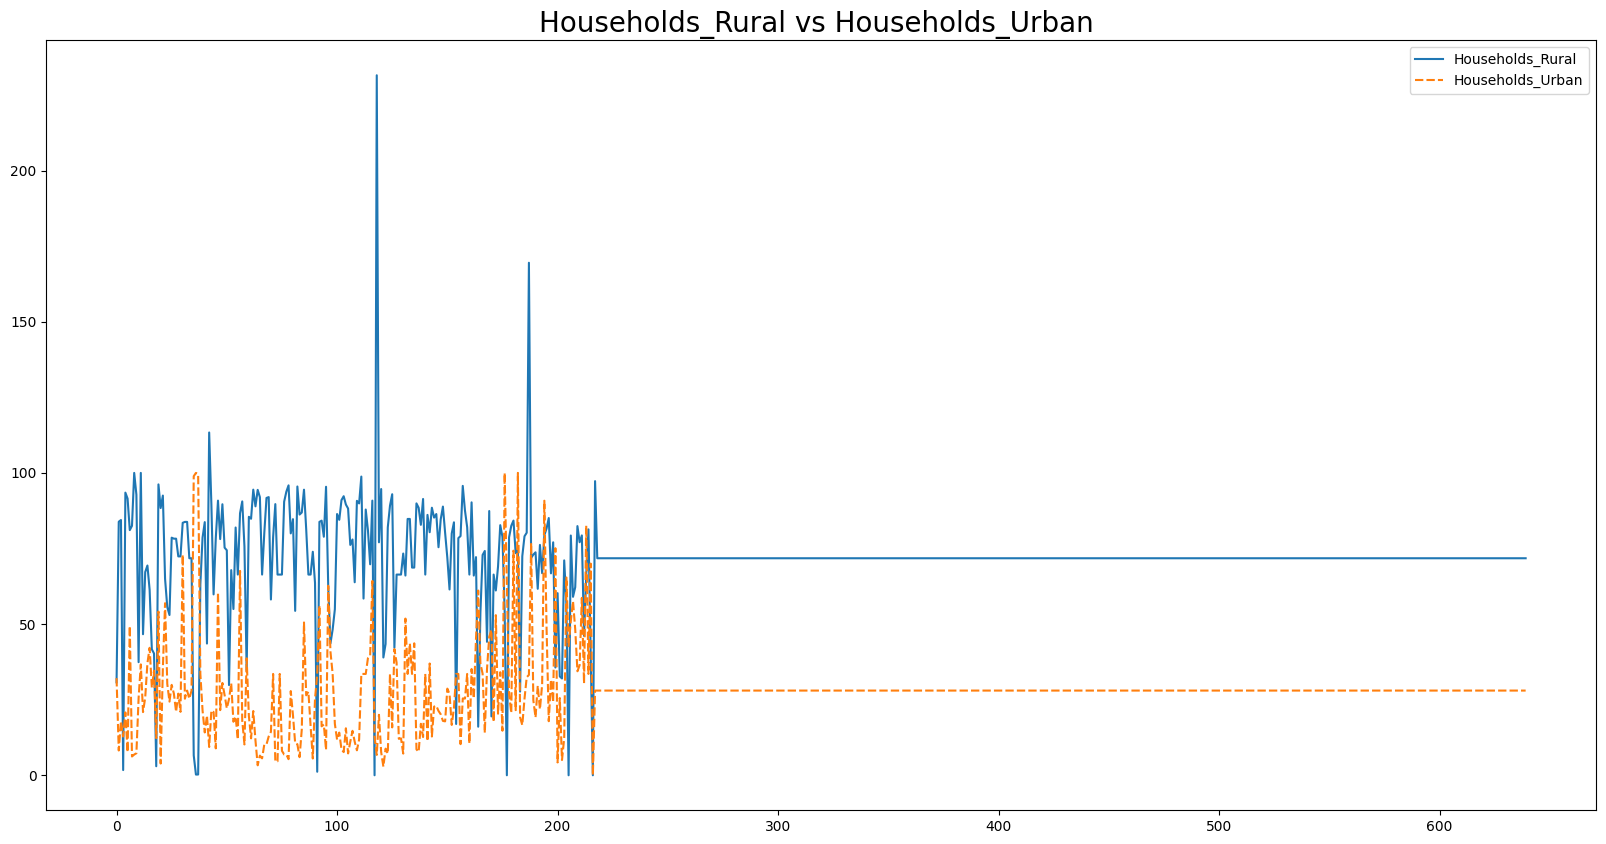

In [29]:
fig,ax=plt.subplots(figsize=(20,10))
ax=sbn.lineplot(data=dff[['Households_Rural', 'Households_Urban']])
ax.set_title("Households_Rural vs Households_Urban ",size=20)

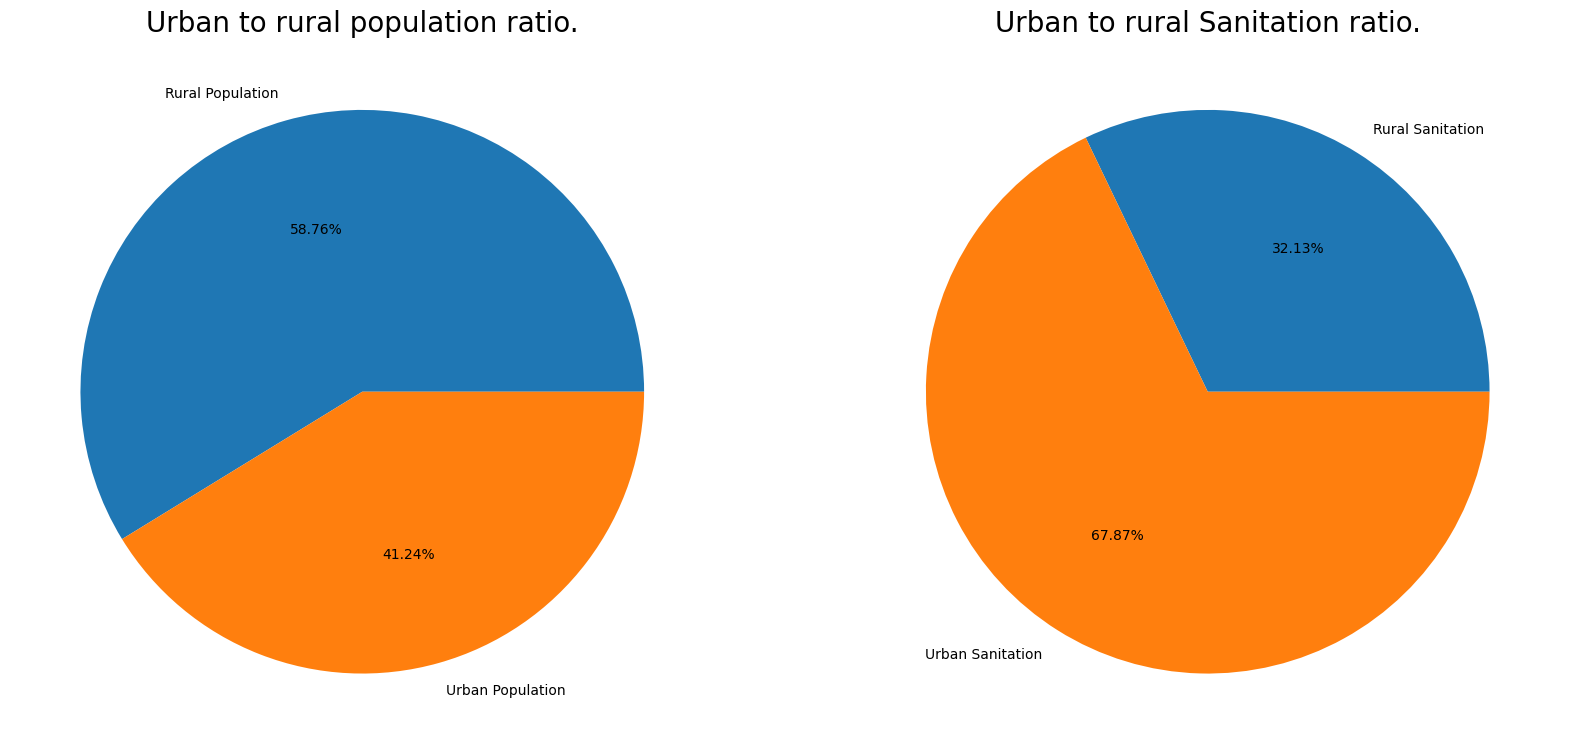

In [30]:
#household and population ratio
fig,ax=plt.subplots(1,2,figsize=(20,10))
data1=[df11["Households_Rural_Livable"].mean(),df12["Households_Urban_Livable"].mean()]
label1=["Rural Population","Urban Population"]
sizes=[20,20]
ax[0].pie(x=data1,labels=label1,autopct="%0.2f%%")
ax[0].set_title("Urban to rural population ratio.",size=20)


data2=[df11["Households_Rural_Toilet_Premise"].mean(),df12["Households_Urban_Toilet_Premise"].mean()]
label2=["Rural Sanitation","Urban Sanitation"]
ax[1].pie(x=data2,labels=label2,autopct="%0.2f%%")
ax[1].set_title("Urban to rural Sanitation ratio.",size=20);

### Problem Statement 9: (Inconsistency in different datasets) After the updates, the “Households_Rural” and “Households_Urban” data are redundant in both housing and census data. Compare the two data and see if there is a major difference between the values in the two files. A difference of more than 10% can be considered a major difference. Report the names of the districts where a major difference is found in the data.


In [31]:
#converting the census data into percentages
df_relevant1=df_relevant[["District","Households_Rural","Households_Urban"]]
census_percentage=pd.DataFrame()
census_percentage["Dist rict"]=df_relevant["District"]
census_percentage["Households_Rural"]=((df_relevant1.Households_Rural/(df_relevant1.Households_Rural+df_relevant1.Households_Urban))*100).round(6)
census_percentage["Households_Urban"]=((df_relevant1.Households_Urban/(df_relevant1.Households_Rural+df_relevant1.Households_Urban))*100).round(6) 

In [32]:
#housing percentage data
housing_percentage=dff[["District","Households_Rural","Households_Urban"]]

In [33]:
#creating a data frame with difference of the urban household and the rural household
difference_df=pd.DataFrame()
difference_df["District"]=dff["District"]
difference_df["Rural_Difference"]=abs(census_percentage["Households_Rural"]-housing_percentage["Households_Rural"])
difference_df["Urban_Difference"]=abs(census_percentage["Households_Urban"]-housing_percentage["Households_Urban"])

#refining data
difference_df=difference_df[(difference_df["Rural_Difference"]<=100)&(difference_df["Urban_Difference"]<=100)]
difference_df

,District,Rural_Difference,Urban_Difference
0,Kupwara,17.099626,20.030748
1,Badgam,1.672229,6.277688
2,Leh(Ladakh),16.544943,14.225483
3,Kargil,82.129753,3.322302
4,Punch,3.840671,10.427607
...,...,...,...
635,Tiruppur,71.774792,71.986536
636,Puducherry,20.402430,20.614174
637,Karaikal,28.225208,28.013464
638,North & Middle Andaman,25.502799,25.291055


In [34]:
res=difference_df[(difference_df["Rural_Difference"]>10)&(difference_df["Urban_Difference"]>10)]
res=res.drop_duplicates(subset='District')
res.sort_values(by=["Rural_Difference","Urban_Difference"],inplace=True,ascending=False)
res.reset_index(drop=True,inplace=True)
print(f"total number of records where major difference was found {res.shape[0]}")

total number of records where major difference was found 389


In [35]:
res.head()

,District,Rural_Difference,Urban_Difference
0,North East,95.158104,91.349564
1,Srinagar,91.070073,90.987777
2,Basti,89.388231,13.309301
3,Allahabad,88.522388,52.347569
4,Pashchim Champaran,87.320634,30.011242


In [36]:
res.tail()

,District,Rural_Difference,Urban_Difference
384,Sheopur,10.243640,10.031896
385,Bokaro,10.212016,10.000272
386,Srikakulam,10.183580,10.395324
387,Bagalkot,10.102440,10.314184
388,Bulandshahr,10.092693,13.381428


In [37]:
res.to_csv('clean_data/clean_housing.csv', index=False)

### Aliah, as a representative of the department, is willing to know if any insights can be gained from the Hospital data (Data/hospitals.csv). Apart from general information she wants to know which states need more hospital beds at the earliest. Assist Aliah to gain insights from the data after cleaning it. 


In [38]:
hsp=pd.read_csv("hospitals.csv")

In [39]:
#before cleaning the data the structure and its attributes data types
hsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    37 non-null     object
 1   PHC           37 non-null     object
 2   CHC           37 non-null     object
 3   SDH           30 non-null     object
 4   DH            37 non-null     object
 5   Hospitals     37 non-null     object
 6   HospitalBeds  37 non-null     object
dtypes: object(7)
memory usage: 2.2+ KB


In [40]:
#checking for null values
hsp.isnull().sum()

Unnamed: 0      0
PHC             0
CHC             0
SDH             7
DH              0
Hospitals       0
HospitalBeds    0
dtype: int64

In [41]:
#changing the relevant data types of the columns which are assigned incorrect
hsp['PHC'] = hsp['PHC'].str.replace(',', '').astype('int64')
hsp['CHC']=hsp['CHC'].str.replace(',', '').astype('int64')
hsp['SDH']=hsp['SDH'].str.replace(',', '').fillna(0).astype('int64')
hsp['DH']=hsp['DH'].str.replace(',', '').astype('int64')
hsp['HospitalBeds']=hsp['HospitalBeds'].str.replace(',', '').astype('int64')

In [42]:
#after modifying the data types of the data frame
hsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    37 non-null     object
 1   PHC           37 non-null     int64 
 2   CHC           37 non-null     int64 
 3   SDH           37 non-null     int64 
 4   DH            37 non-null     int64 
 5   Hospitals     37 non-null     object
 6   HospitalBeds  37 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 2.2+ KB


In [43]:
# afger filling the null values with 0 in SDH
hsp.isnull().sum()

Unnamed: 0      0
PHC             0
CHC             0
SDH             0
DH              0
Hospitals       0
HospitalBeds    0
dtype: int64

In [44]:
#recalculation calculating Hospitals for any unknown errors
hsp['Hospitals'] = hsp['PHC'].astype(int)+hsp['CHC'].astype(int)+ hsp['SDH'].astype(int)+ hsp['DH'].astype(int)

### Problem Statement 10: (Fix the header) Import the hospital data from Data/hospitals.csv and make the necessary changes to the header (Do not change the original file). The header uses acronyms that are defined in metadata.csv. Find the data and rename the headers so that it is more understandable to users who are not familiar with the acronyms. The First cell in the header is missing which should be renamed to State/UT. Rename the other headers in a uniform format. 

In [45]:
#renaming the unamed column to UT
hsp.rename(columns={"Unnamed: 0":"State/UT"},inplace=True)

In [46]:
Acryomyms=pd.read_csv("metadata.csv")
Acryomyms

,Acronyms
0,"Number of Primary Health Centers(PHCs),"
1,"Community Health Centers(CHCs),"
2,Sub-District/Divisional Hospitals(SDHs)
3,District Hospitals(DHs)


In [47]:
#renaming the columns as per Acronyms from Metadata.csv
hsp.rename(columns={'PHC':"Number of Primary Health Centers", 'CHC':"Community Health Centers", 'SDH':"Sub-District/Divisional Hospitals", 'DH':"District Hospitals"},inplace=True)

In [48]:
hsp.columns

Index(['State/UT', 'Number of Primary Health Centers',
       'Community Health Centers', 'Sub-District/Divisional Hospitals',
       'District Hospitals', 'Hospitals', 'HospitalBeds'],
      dtype='object')

### Problem Statement 11: (Create a function to alter the data to create uniformity) The State/UT names have some different formats compared to other census and housing data. Manually identify those differences and fix them so that the State/UT names match exactly with the census and housing data. A function should be created to perform this operation. Since the same operation is required for another dataset as well. After the process save the data in a CSV file named “all_hospitals.csv” in the “Clean_Data” folder

In [49]:
def ExceptAndTitle(text):
    text=str(text)
    text=text.replace("&","and")
    text.lower()
    l=text.split(" ")
    l=[i[0].upper()+i[1::] if i not in["and","of"] else i for i in l]
    return " ".join(l)


In [50]:
hsp['State/UT']=hsp['State/UT'].apply(ExceptAndTitle)

In [51]:
#saving the cleaned data to clean_data folder
hsp.to_csv("clean_data/all_hospitals.csv",index=False)

### Problem Statement 12: (Analyze Healthcare facility disparity) Visually represent how many hospital beds are there for every 10,000 people in each state or union territory. The national value should also be represented in the same visualization such that the value for each state can be compared to it.  

In [52]:
#hospital beds info
hsp_beds=hsp[["State/UT","HospitalBeds"]]
hsp_beds

,State/UT,HospitalBeds
0,Andaman and Nicobar Islands,1246
1,Andhra Pradesh,60799
2,Arunachal Pradesh,2320
3,Assam,19115
4,Bihar,17796
5,Chandigarh,3756
6,Chhattisgarh,14354
7,Dadra and Nagar Haveli,568
8,Daman and Diu,298
9,Delhi,20572


In [53]:
#displaying the population with actual values
pd.options.display.float_format = '{:.0f}'.format

In [54]:
#population info
population=pd.DataFrame(df_relevant.groupby("State/UT")["Population"].mean())
population.reset_index(drop=False,inplace=True)

In [55]:
Group_beds_poplation=pd.merge(hsp_beds,population,on="State/UT")
#beds per 10000 patients
Group_beds_poplation['beds_per_10000_people'] = (Group_beds_poplation['HospitalBeds'] / Group_beds_poplation['Population']) * 10000

In [56]:
Group_beds_poplation.sort_values(by="beds_per_10000_people",inplace=True)
Group_beds_poplation.reset_index(drop=True,inplace=True)
Group_beds_poplation

,State/UT,HospitalBeds,Population,beds_per_10000_people
0,Dadra and Nagar Haveli,568,343709,17
1,Sikkim,1145,589091,19
2,Daman and Diu,298,121624,25
3,Mizoram,2312,805639,29
4,Nagaland,1944,658429,30
5,Chandigarh,3756,1055450,36
6,Goa,2666,729272,37
7,Lakshadweep,250,64473,39
8,Arunachal Pradesh,2320,527543,44
9,Telangana,17358,3519398,49


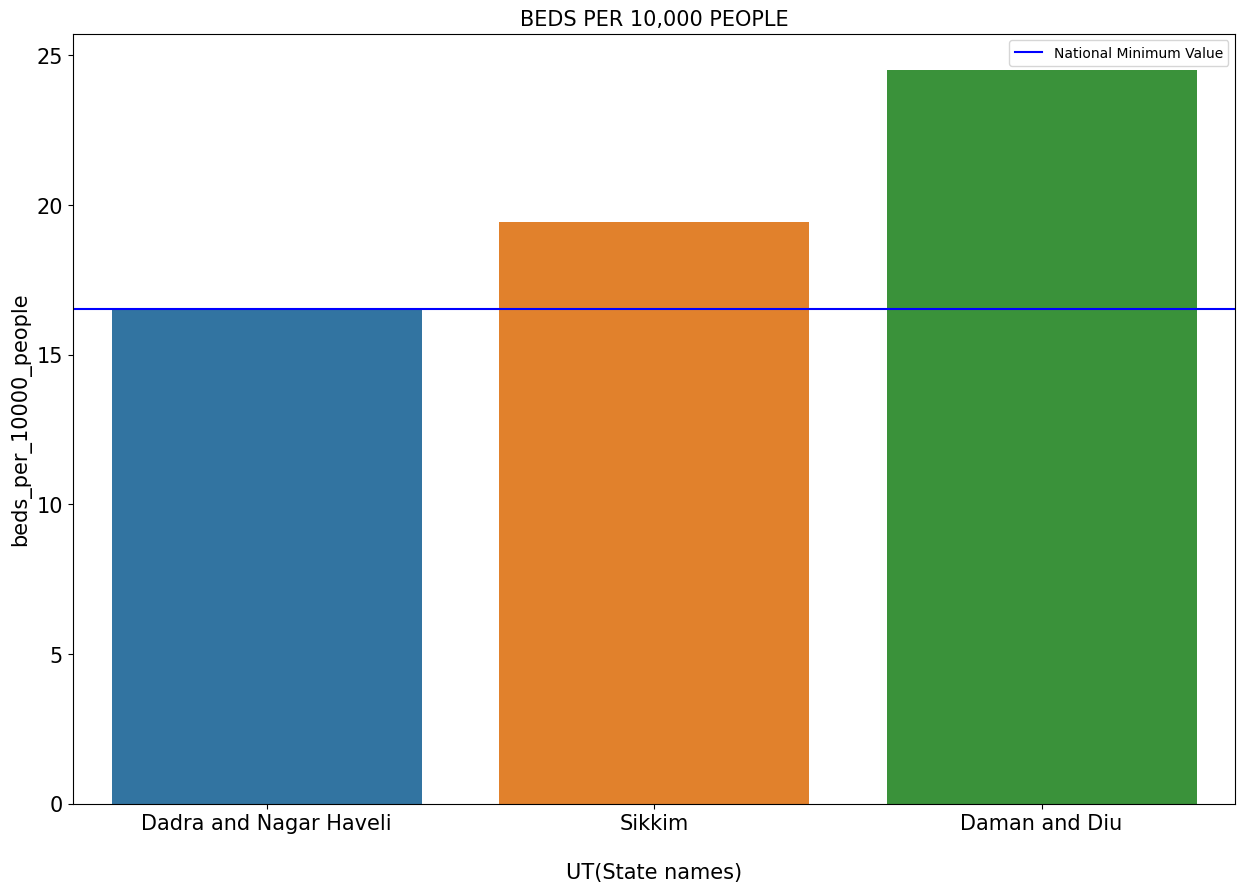

In [57]:
ax=plt.subplots(figsize=(15,10))
ax=sbn.barplot(data=Group_beds_poplation.loc[0:2],x="State/UT",y="beds_per_10000_people")
ax.set_title("beds per 10,000 people".upper(),size=15)
plt.ylabel("beds_per_10000_people",size=15)
plt.xlabel("\nUT(State names)",size=15)
plt.axhline(Group_beds_poplation.beds_per_10000_people.mode()[0], color='blue', linestyle='-', label='National Minimum Value')
plt.legend()
plt.xticks(size=15)
plt.yticks(size=15);

#### here I took the most recuting number of beds as the national term as most of the states following it as the min value  

### Government Hospitals Requirement Analysis The Union of Doctors in its meeting passed a resolution that the government hospitals are lacking in numbers in many states, The government has taken notice of the resolution and has asked for a recommendation for the state where a new government hospital can be set up.  Use the government hospital data (Data/government_hospitals.csv) to suggest which state the government should create a new hospital.
 

In [58]:
gov_hsp=pd.read_csv("government_hospitals.csv")

In [59]:
#droping the 1 as it has no significance
gov_hsp = gov_hsp.drop(index=[0,37])

In [60]:
gov_hsp=gov_hsp.rename(columns={'Rural hospitals':"No.", 'Unnamed: 2':"Beds.", 'Urban hospitals':"No",'Unnamed: 4':"Beds"})
#changing the object as on to date time object dd/mm/yyyy format
gov_hsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 1 to 36
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   States/UTs  36 non-null     object
 1   No.         36 non-null     object
 2   Beds.       36 non-null     object
 3   No          36 non-null     object
 4   Beds        36 non-null     object
 5   As on       36 non-null     object
dtypes: object(6)
memory usage: 1.8+ KB


In [61]:
gov_hsp['As on'] = pd.to_datetime(gov_hsp['As on'], format='mixed').dt.strftime('%d/%m/%Y')

In [62]:
gov_hsp

,States/UTs,No.,Beds.,No,Beds,As on
1,Andhra Pradesh,193,6480,65,16658,01/01/2017
2,Arunachal Pradesh*,208,2136,10,268,31/12/2017
3,Assam,1176,10944,50,6198,31/12/2017
4,Bihar,930,6083,103,5936,31/12/2016
5,Chhattisgarh,169,5070,45,4342,01/01/2016
6,Goa*,17,1405,25,1608,31/12/2017
7,Gujarat,364,11715,122,20565,31/12/2016
8,Haryana*,609,6690,59,4550,31/12/2016
9,Himachal Pradesh*,705,5665,96,6734,31/12/2017
10,Jammu & Kashmir,56,7234,76,4417,30/12/2016


### Problem Statement 13: (Multi-line header) The header in (Data/government_hospitals.csv) is in 2 rows 
    States/UTs | Rural hospitals| Urban hospitals| As on|
               | No.   |  Beds  | No.  |   Beds  |
The headers are required to be edited for ease of future use as well as for the sake of uniformity. 
Import and update the data in a way that it has the following column names
1. State/UT
2. Rural_Government_Hospitals
3. Rural_Government_Beds
4. Urban_Government_Hospitals
5. Urban_Government_Beds
6. Last_Updated


In [63]:
#creating the columns as per the requirement
new_hsp = pd.DataFrame({
    ("States/UTs",""):gov_hsp["States/UTs"],
    ('Rural', 'Rural_Government_Hospitals'): gov_hsp['No.'],
    ('Rural', 'Rural_Government_Beds'): gov_hsp['Beds.'],
    ('Urbal', 'Urban_Government_Hospitals'): gov_hsp['No'],
    ('Urbal', 'Urban_Government_Beds'): gov_hsp['Beds'],
    ("Last_Updated",""):gov_hsp["As on"]
})

In [64]:
new_hsp

States/UTs                      Rural  \
                              Rural_Government_Hospitals   
1              Andhra Pradesh                        193   
2          Arunachal Pradesh*                        208   
3                       Assam                       1176   
4                       Bihar                        930   
5                Chhattisgarh                        169   
6                        Goa*                         17   
7                     Gujarat                        364   
8                    Haryana*                        609   
9           Himachal Pradesh*                        705   
10            Jammu & Kashmir                         56   
11                  Jharkhand                        519   
12                 Karnataka*                       2471   
13                     Kerala                        981   
14             Madhya Pradesh                        334   
15                Maharashtra                        273   
16                    Manipur                         23   
17                 Meghalaya*                        143   
18                   Mizoram*                         56   
19                   Nagaland                         21   
20                    Odisha*                       1655   
21                    Punjab*                        510   
22                  Rajasthan                        602   
23                    Sikkim*                         24   
24                Tamil Nadu*                        692   
25                 Telangana*                        802   
26                   Tripura*                         99   
27             Uttar Pradesh*                       4442   
28                Uttarakhand                        410   
29                West Bengal                       1272   
30  Andaman & Nicobar Islands                         27   
31                 Chandigarh                          0   
32      Dadra & Nagar Haveli*                         10   
33                Daman & Diu                          5   
34                      Delhi                          0   
35                Lakshadweep                          9   
36                 Puducherry                          3   

                                              Urbal                        \
   Rural_Government_Beds Urban_Government_Hospitals Urban_Government_Beds   
1                   6480                         65                 16658   
2                   2136                         10                   268   
3                  10944                         50                  6198   
4                   6083                        103                  5936   
5                   5070                         45                  4342   
6                   1405                         25                  1608   
7                  11715                        122                 20565   
8                   6690                         59                  4550   
9                   5665                         96                  6734   
10                  7234                         76                  4417   
11                  5842                         36                  4942   
12                 21072                        374                 49093   
13                 16865                        299                 21139   
14                 10020                        117                 18819   
15                 12398                        438                 39048   
16                   730                          7                   697   
17                  1970                         14                  2487   
18                   604                         34                  1393   
19                   630                         15                  1250   
20                  6339                        149                 12180   
21                  5805                    

### Problem Statement 14: (Data update and code reuse)The ”Last_Updated” column contains a date that is in the format  DD.MM.YYYY but in the future, the date is required in a different format (YYYY-MM-DD)  update the date to the required format.The State/UT names have some different formats compared to other census and housing data. Fix those issues using the function created earlier. If the function created earlier for all_hospitals cannot be used for government_hospital then edit the function so that it can be used for both. Create a new file “government_hospital.csv” in the “Clean” folder and save all the government hospital data after the update.

In [65]:
#changing the date time object to our mentioned format
new_hsp['Last_Updated'] = pd.to_datetime(new_hsp['Last_Updated'], format='mixed').dt.strftime('%Y/%m/%d')

In [66]:
new_hsp

States/UTs                      Rural  \
                              Rural_Government_Hospitals   
1              Andhra Pradesh                        193   
2          Arunachal Pradesh*                        208   
3                       Assam                       1176   
4                       Bihar                        930   
5                Chhattisgarh                        169   
6                        Goa*                         17   
7                     Gujarat                        364   
8                    Haryana*                        609   
9           Himachal Pradesh*                        705   
10            Jammu & Kashmir                         56   
11                  Jharkhand                        519   
12                 Karnataka*                       2471   
13                     Kerala                        981   
14             Madhya Pradesh                        334   
15                Maharashtra                        273   
16                    Manipur                         23   
17                 Meghalaya*                        143   
18                   Mizoram*                         56   
19                   Nagaland                         21   
20                    Odisha*                       1655   
21                    Punjab*                        510   
22                  Rajasthan                        602   
23                    Sikkim*                         24   
24                Tamil Nadu*                        692   
25                 Telangana*                        802   
26                   Tripura*                         99   
27             Uttar Pradesh*                       4442   
28                Uttarakhand                        410   
29                West Bengal                       1272   
30  Andaman & Nicobar Islands                         27   
31                 Chandigarh                          0   
32      Dadra & Nagar Haveli*                         10   
33                Daman & Diu                          5   
34                      Delhi                          0   
35                Lakshadweep                          9   
36                 Puducherry                          3   

                                              Urbal                        \
   Rural_Government_Beds Urban_Government_Hospitals Urban_Government_Beds   
1                   6480                         65                 16658   
2                   2136                         10                   268   
3                  10944                         50                  6198   
4                   6083                        103                  5936   
5                   5070                         45                  4342   
6                   1405                         25                  1608   
7                  11715                        122                 20565   
8                   6690                         59                  4550   
9                   5665                         96                  6734   
10                  7234                         76                  4417   
11                  5842                         36                  4942   
12                 21072                        374                 49093   
13                 16865                        299                 21139   
14                 10020                        117                 18819   
15                 12398                        438                 39048   
16                   730                          7                   697   
17                  1970                         14                  2487   
18                   604                         34                  1393   
19                   630                         15                  1250   
20                  6339                        149                 12180   
21                  5805                    

In [67]:
#maintianing the naming format of the UT/states
def ExceptAndTitle(text):
    text=str(text)
    text=text.replace("&","and")
    text.lower()
    l=text.split(" ")
    l=[i[0].upper()+i[1::] if i not in["and","of"] else i for i in l]
    return " ".join(l)

In [68]:
new_hsp['States/UTs']=new_hsp['States/UTs'].apply(ExceptAndTitle)

In [69]:
new_hsp

States/UTs                      Rural  \
                                Rural_Government_Hospitals   
1                Andhra Pradesh                        193   
2            Arunachal Pradesh*                        208   
3                         Assam                       1176   
4                         Bihar                        930   
5                  Chhattisgarh                        169   
6                          Goa*                         17   
7                       Gujarat                        364   
8                      Haryana*                        609   
9             Himachal Pradesh*                        705   
10            Jammu and Kashmir                         56   
11                    Jharkhand                        519   
12                   Karnataka*                       2471   
13                       Kerala                        981   
14               Madhya Pradesh                        334   
15                  Maharashtra                        273   
16                      Manipur                         23   
17                   Meghalaya*                        143   
18                     Mizoram*                         56   
19                     Nagaland                         21   
20                      Odisha*                       1655   
21                      Punjab*                        510   
22                    Rajasthan                        602   
23                      Sikkim*                         24   
24                  Tamil Nadu*                        692   
25                   Telangana*                        802   
26                     Tripura*                         99   
27               Uttar Pradesh*                       4442   
28                  Uttarakhand                        410   
29                  West Bengal                       1272   
30  Andaman and Nicobar Islands                         27   
31                   Chandigarh                          0   
32      Dadra and Nagar Haveli*                         10   
33                Daman and Diu                          5   
34                        Delhi                          0   
35                  Lakshadweep                          9   
36                   Puducherry                          3   

                                              Urbal                        \
   Rural_Government_Beds Urban_Government_Hospitals Urban_Government_Beds   
1                   6480                         65                 16658   
2                   2136                         10                   268   
3                  10944                         50                  6198   
4                   6083                        103                  5936   
5                   5070                         45                  4342   
6                   1405                         25                  1608   
7                  11715                        122                 20565   
8                   6690                         59                  4550   
9                   5665                         96                  6734   
10                  7234                         76                  4417   
11                  5842                         36                  4942   
12                 21072                        374                 49093   
13                 16865                        299                 21139   
14                 10020                        117                 18819   
15                 12398                        438                 39048   
16                   730                          7                   697   
17                  1970                         14                  2487   
18                   604                         34                  1393   
19                   630                         15                  1250   
20                  6339                       

In [70]:
#saving data to clean_data folder
new_hsp.to_csv("clean_data/government_hospital.csv")

### Problem Statement 15: (Government healthcare facility disparity) Since the resources are limited, it is required to identify the region which lacks the healthcare facility the most for creating new government hospitals. An idea was suggested* that first the three States/UTs which have the least amount of beds (in all hospitals government and private) for their population is identified. Among those three the state which has the least number of government hospitals can be recommended for setting up a new government hospital.


In [71]:
#taking the data from the 12th problem
hsp_lacking=hsp[["State/UT","Hospitals"]]
hsp_lacking=hsp_lacking.sort_values(by="Hospitals")
hsp_lacking.reset_index(drop=True,inplace=True)

In [72]:
hsp_lacking

,State/UT,Hospitals
0,Daman and Diu,8
1,Lakshadweep,10
2,Dadra and Nagar Haveli,13
3,Sikkim,32
4,Andaman and Nicobar Islands,34
5,Goa,40
6,Chandigarh,47
7,Puducherry,53
8,Mizoram,87
9,Manipur,114


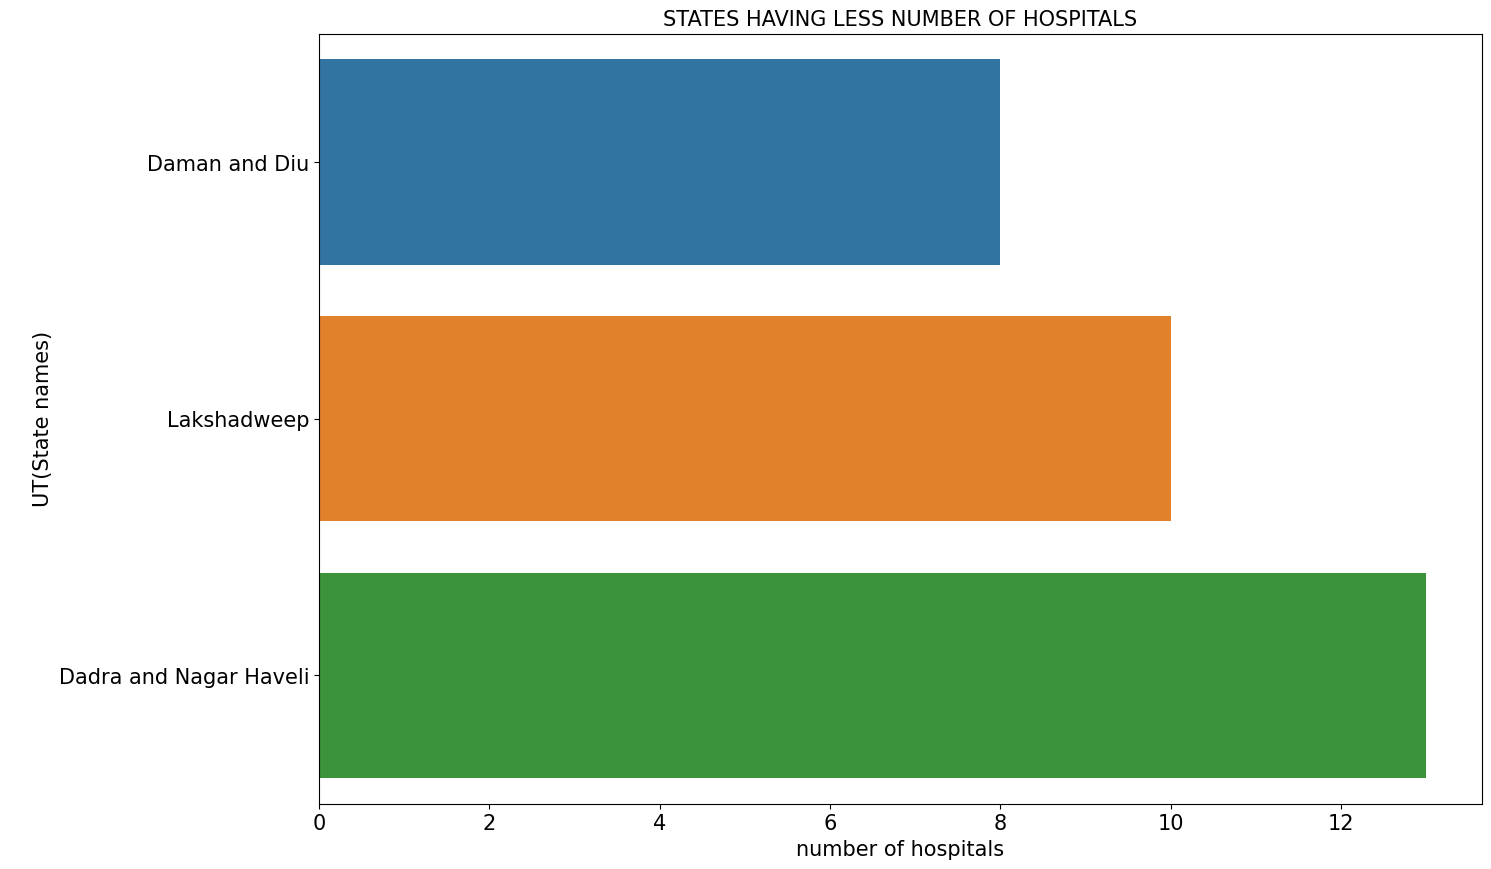

In [73]:
ax=plt.subplots(figsize=(15,10))
ax=sbn.barplot(data=hsp_lacking.loc[:2],y="State/UT",x="Hospitals")
ax.set_title("states having less number of hospitals".upper(),size=15)
plt.xlabel("number of hospitals",size=15)
plt.ylabel("\nUT(State names)",size=15)
plt.xticks(size=15)
plt.yticks(size=15);

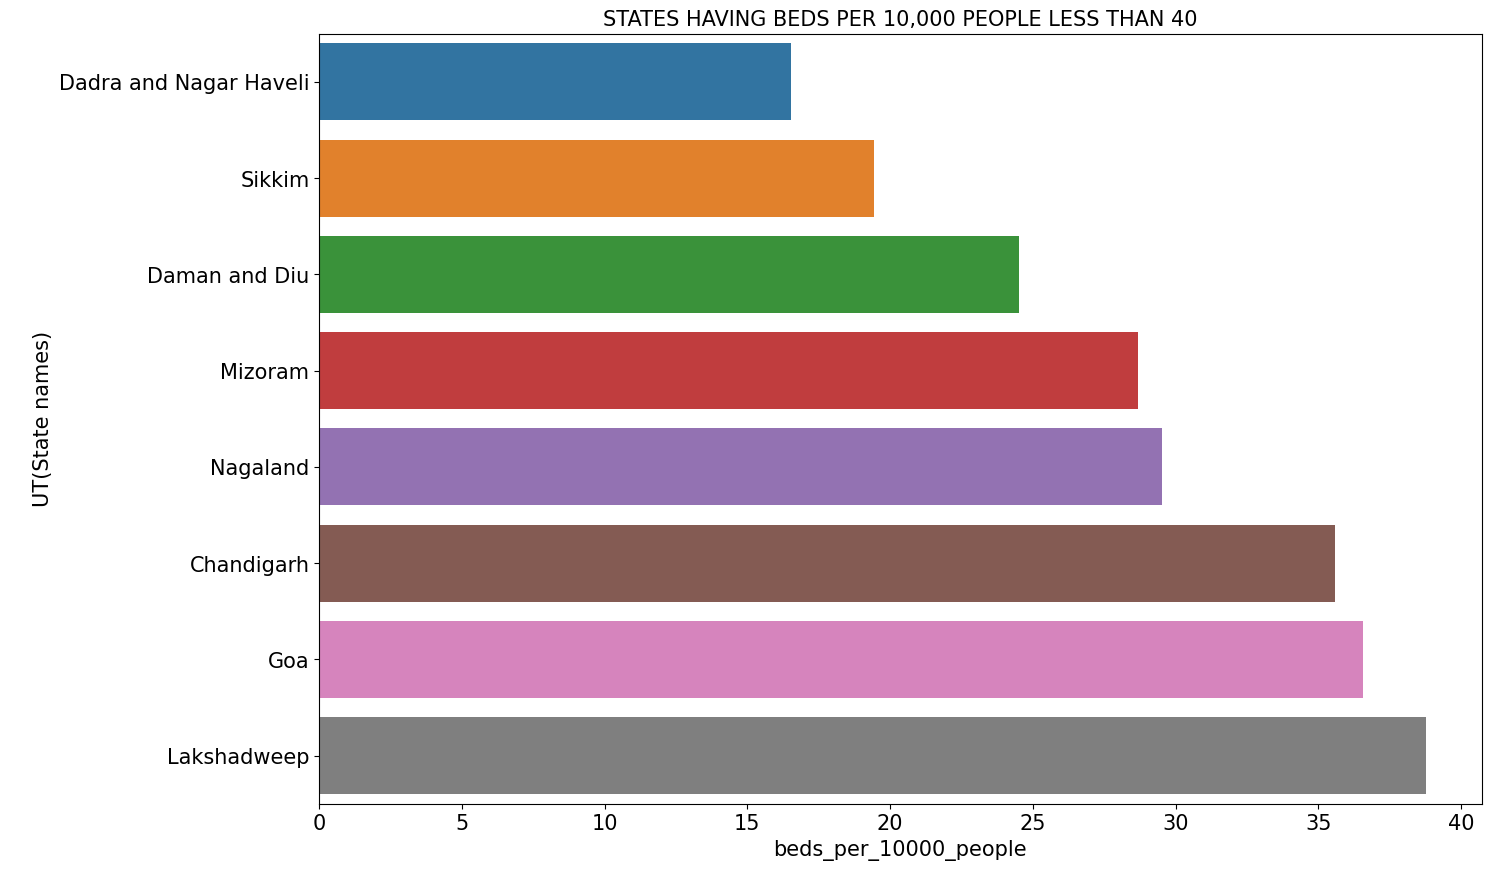

In [74]:
ax=plt.subplots(figsize=(15,10))
ax=sbn.barplot(data=Group_beds_poplation[(Group_beds_poplation.beds_per_10000_people<40)],y="State/UT",x="beds_per_10000_people")
ax.set_title("states having beds per 10,000 people less than 40".upper(),size=15)
plt.xlabel("beds_per_10000_people",size=15)
plt.ylabel("\nUT(State names)",size=15)
plt.xticks(size=15)
plt.yticks(size=15);

## World Health Organization Standards
### According to WHO standards, a minimum of 3 beds per 1000 people is required. Monica wants to analyse whether different regions in India as well as the nation as a whole are up to that standard. If not, how many facilities are required to fill the gap?


### (my teriminology) as per mentioned 3 beds for 1000 people minimum then 30 beds for 10k people is required

### Problem Statement 16: (Gap in number of beds) Visually represent the difference between the expected number of hospital beds and the available number of hospital beds in each State/UT, as well as at the national level (if any).


In [75]:
bed_per_1000=pd.DataFrame(Group_beds_poplation[["State/UT","beds_per_10000_people"]])

In [76]:
bed_per_1000["beds_per_1000_people"]=(bed_per_1000["beds_per_10000_people"]/10).round()

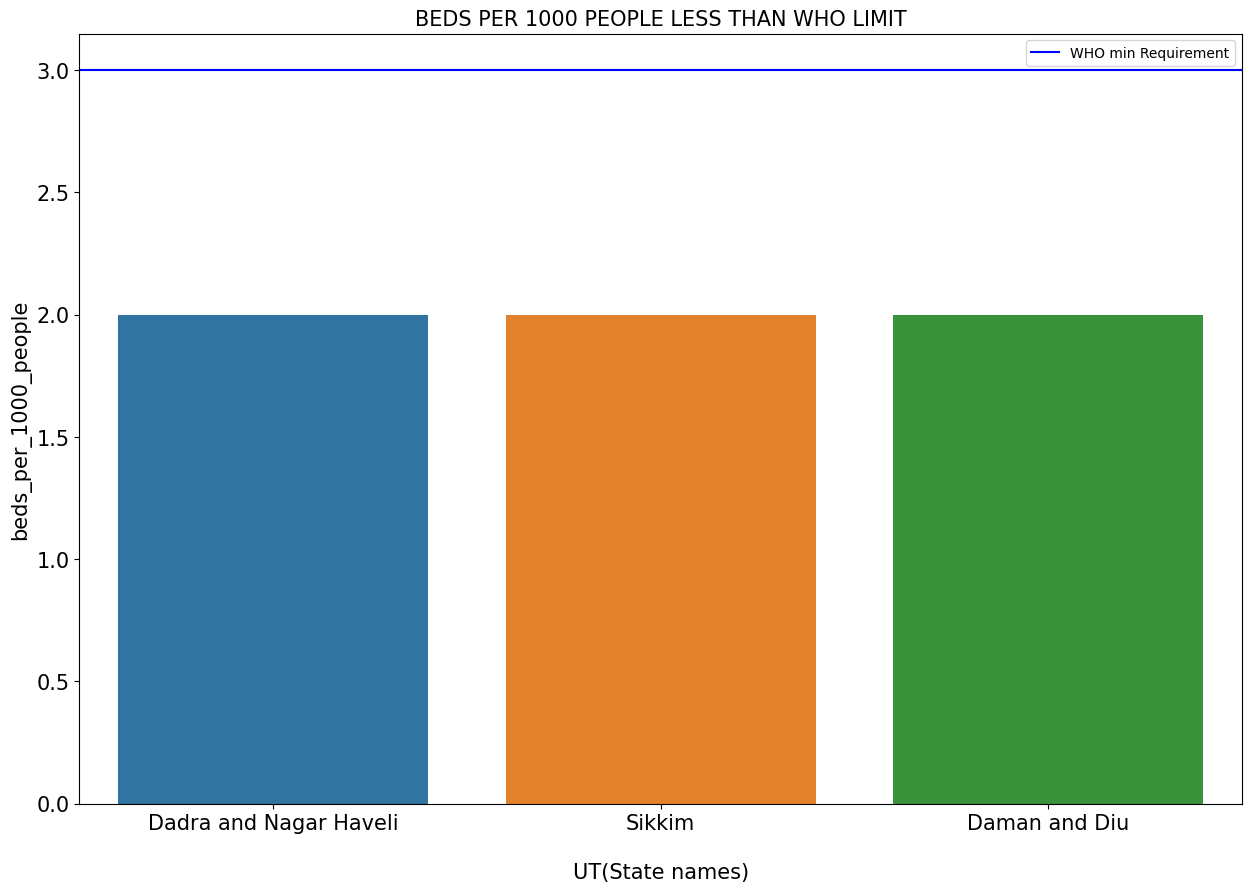

In [77]:
ax=plt.subplots(figsize=(15,10))
ax=sbn.barplot(data=bed_per_1000[(bed_per_1000['beds_per_1000_people']<3)],x="State/UT",y="beds_per_1000_people")
ax.set_title("beds per 1000 people less than WHO limit".upper(),size=15)
plt.ylabel("beds_per_1000_people",size=15)
plt.xlabel("\nUT(State names)",size=15)
plt.axhline(3, color='blue', linestyle='-', label='WHO min Requirement')
plt.legend()
plt.xticks(size=15)
plt.yticks(size=15);

### Problem Statement 17: (Hospitals required to meet the standards) In a hypothetical situation if the government wishes to fill the gap between the available facility and the WHO standards all by itself how many government hospitals may be required in each state or union territory as well as at the national level?


In [78]:
bed_per_1000["need_no_of_beds_as_per_WHO"]=np.where(bed_per_1000["beds_per_1000_people"] < 3,3 - bed_per_1000["beds_per_1000_people"],0)

In [79]:
bed_per_1000[(bed_per_1000["need_no_of_beds_as_per_WHO"]>0)]

,State/UT,beds_per_10000_people,beds_per_1000_people,need_no_of_beds_as_per_WHO
0,Dadra and Nagar Haveli,17,2,1
1,Sikkim,19,2,1
2,Daman and Diu,25,2,1
